In [1]:
import os
import numpy as np
import time
import pf_pytools.pf_fort_io as pf_fort_io
import pfio
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
input_pfb = '/home/arezaii/git/tools/tests/press.init.pfb'

In [3]:
t2 = time.perf_counter()
pfb_c_data = pfio.pfread(input_pfb)
# Flip not needed with new PFIO code
pfb_c_data = np.flip(pfb_c_data,axis=1)
t3 = time.perf_counter()
print(f'load time {t3-t2:0.4f} seconds')

load time 0.0027 seconds


In [4]:
t2 = time.perf_counter()
pfb_f_data = np.zeros((41,41,50), order='F')
pf_fort_io.pfb_read(pfb_f_data, input_pfb)
# X Y Z -> Z Y X
pfb_f_data = np.transpose(pfb_f_data,(2,1,0))
t3 = time.perf_counter()
print(f'load time {t3-t2:0.4f} seconds')

load time 0.0009 seconds


## Use numpy testing to make sure the data are all equal.

this function returns None if the arrays are exactly the same, otherwise an exception will be thrown.

In [5]:
np.testing.assert_array_equal(pfb_f_data, pfb_c_data)

## Prepare for plotting

Used xarray because it provides convenient plotting features

In [6]:
xds1 = xr.DataArray(pfb_c_data)
xds2 = xr.DataArray(pfb_f_data)

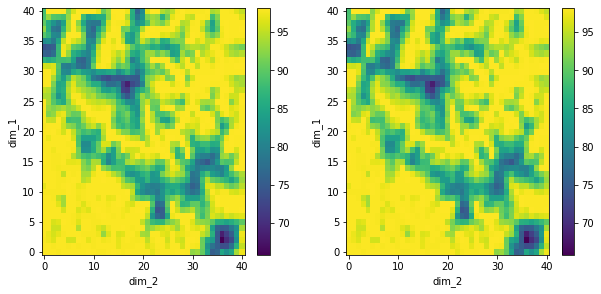

In [7]:
fig = plt.figure(figsize=[10, 10])
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
xds1[0,:,:].plot(ax=ax1)
xds2[0,:,:].plot(ax=ax2)

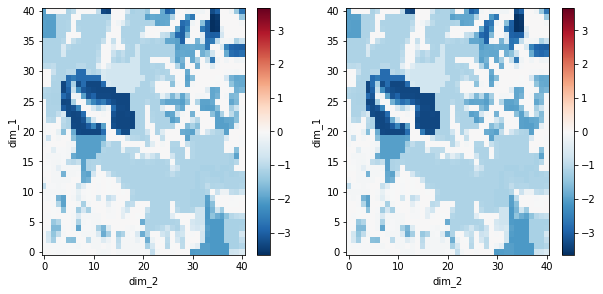

In [8]:
fig = plt.figure(figsize=[10, 10])
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
xds1[-1,:,:].plot(ax=ax1)
xds2[-1,:,:].plot(ax=ax2)

## Read/Write Validation

Let's make sure that we can read a .pfb file, write the data we read back to disk, then read that data back and make sure it's the same! 

In [9]:
pfb_c_outfile = 'test_pfio_write.pfb'
pfb_f_outfile = 'test_fort_io_write.pfb'

In [10]:
pfio.pfwrite(np.flip(pfb_c_data, axis=1), pfb_c_outfile, 0,0,0,1000,1000,1000)
pf_fort_io.pfb_write(np.transpose(pfb_f_data, (2,1,0)), pfb_f_outfile, 0,0,0,1000,1000,1000)

In [11]:
pfb_c_data_read = pfio.pfread(pfb_c_outfile)
pfb_f_data_read = np.zeros((41,41,50), order='F')
pf_fort_io.pfb_read(pfb_f_data_read, pfb_f_outfile)

pfb_c_data_read = np.flip(pfb_c_data_read, axis=1)
pfb_f_data_read = np.transpose(pfb_f_data_read, (2,1,0))

In [12]:
os.remove(pfb_c_outfile)
os.remove(pfb_f_outfile)

In [13]:
xds_c_read = xr.DataArray(pfb_c_data_read)
xds_f_read = xr.DataArray(pfb_f_data_read)

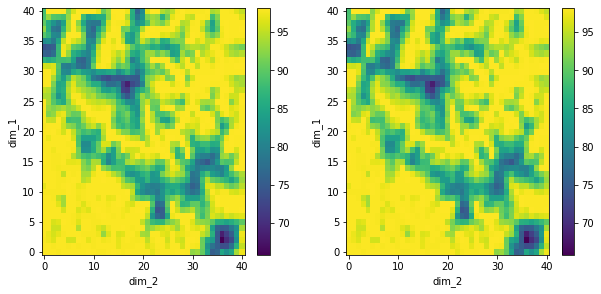

In [14]:
fig = plt.figure(figsize=[10, 10])
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
xds_c_read[0,:,:].plot(ax=ax1)
xds_f_read[0,:,:].plot(ax=ax2)

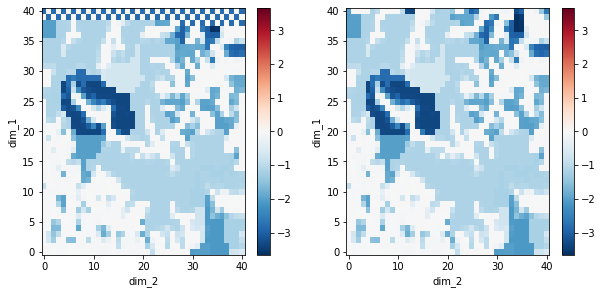

In [15]:
fig = plt.figure(figsize=[10, 10])
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
xds_c_read[-1,:,:].plot(ax=ax1)
xds_f_read[-1,:,:].plot(ax=ax2)

In [16]:
# Make sure the fortran arrays are equal
np.testing.assert_array_equal(pfb_f_data_read, pfb_f_data)

In [17]:
# The C arrays appear equal until the last Z layer
np.testing.assert_array_equal(pfb_c_data_read[:-1, :, :], pfb_c_data[:-1, :, :])

In [18]:
# Make sure the C arrays are equal
np.testing.assert_array_equal(pfb_c_data_read, pfb_c_data)

AssertionError: 
Arrays are not equal

Mismatched elements: 95 / 84050 (0.113%)
Max absolute difference: 3.6163819
Max relative difference: 15761.57464594
 x: array([[[ 9.800360e+01,  9.800901e+01,  9.800599e+01, ...,
          8.486828e+01,  9.387037e+01,  9.736460e+01],
        [ 9.800431e+01,  9.793230e+01,  9.792827e+01, ...,...
 y: array([[[ 9.800360e+01,  9.800901e+01,  9.800599e+01, ...,
          8.486828e+01,  9.387037e+01,  9.736460e+01],
        [ 9.800431e+01,  9.793230e+01,  9.792827e+01, ...,...

## Cleanup 

Because we don't want to run out of memory on subsequent runs

In [ ]:
del(pfb_f_data)
del(pfb_c_data)

In [ ]:
del(xds1)
del(xds2)